In [1]:
import pandas as pd

# Show graph creation in Python

Lead into first js tutorial

In [2]:
df=pd.read_csv("player_affiliations.csv").fillna("UNK")
df

,position,name,club_team,club_league,group,international_team
0,Goalkeeper,Saad Al-Sheeb,Al Sadd,AFC Champions League,A,Qatar
1,Goalkeeper,Yousof Hassan,Al Gharafa,AFC Champions League,A,Qatar
2,Goalkeeper,Meshaal Barsham,Al Sadd,AFC Champions League,A,Qatar
3,Defender,Pedro Miguel,Al Sadd,AFC Champions League,A,Qatar
4,Defender,Abdelkarim Hassan,Al Sadd,AFC Champions League,A,Qatar
...,...,...,...,...,...,...
827,Forward,Cho Gue-Sung,Jeonbuk Motors,AFC Champions League,H,South Korea
828,Forward,Hwang Hee-Chan,Wolverhampton Wanderers,English Premier League,H,South Korea
829,Forward,Hwang Ui-Jo,Olympiakos,Greek Super League,H,South Korea
830,Forward,Na Sang-Ho,FC Tokyo,Japanese J League,H,South Korea


Graph named 'G208' with 809 nodes and 1112 edges
142 connected components


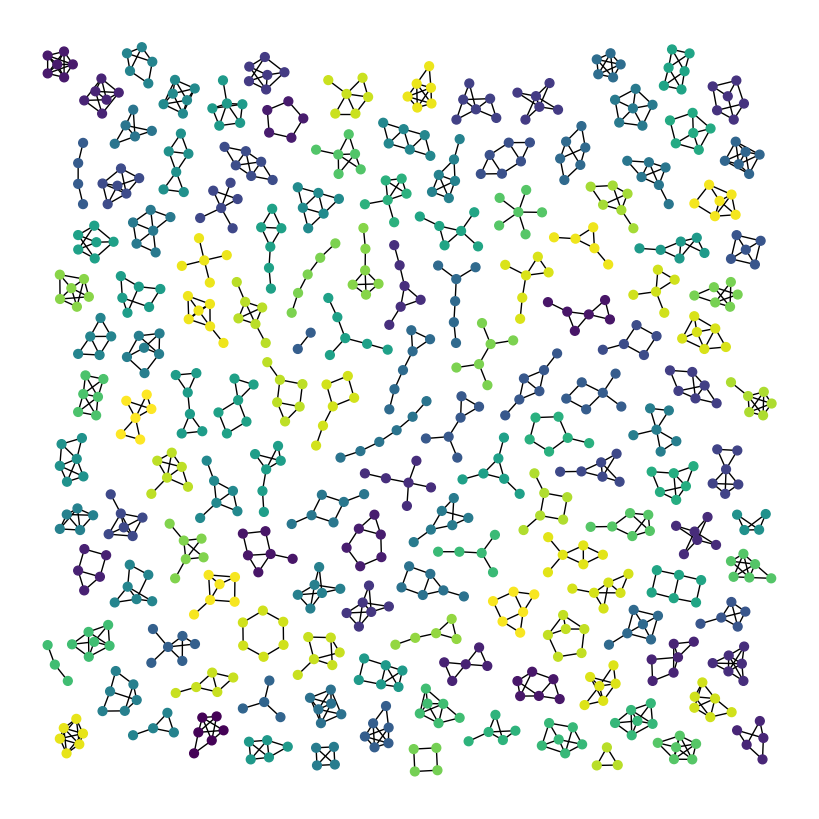

In [3]:
import random

import matplotlib.pyplot as plt
import networkx as nx


GraphMatcher = nx.isomorphism.vf2userfunc.GraphMatcher


def atlas6():
    """Return the atlas of all connected graphs with at most 6 nodes"""

    Atlas = nx.graph_atlas_g()[3:209]  # 0, 1, 2 => no edges. 208 is last 6 node graph
    U = nx.Graph()  # graph for union of all graphs in atlas
    for G in Atlas:
        # check if connected
        if nx.number_connected_components(G) == 1:
            # check if isomorphic to a previous graph
            if not GraphMatcher(U, G).subgraph_is_isomorphic():
                U = nx.disjoint_union(U, G)
    return U


G = atlas6()

print(G)
print(nx.number_connected_components(G), "connected components")

plt.figure(1, figsize=(8, 8))
# layout graphs with positions using graphviz neato
pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
# color nodes the same in each connected subgraph
C = (G.subgraph(c) for c in nx.connected_components(G))
for g in C:
    c = [random.random()] * nx.number_of_nodes(g)  # random color...
    nx.draw(g, pos, node_size=40, node_color=c, vmin=0.0, vmax=1.0, with_labels=False)
plt.show()